In [35]:

import sklearn
import pandas as pd
import numpy as np
import feather
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
train = feather.read_dataframe('../cache/train_stage2.feather')

In [18]:
test = feather.read_dataframe('../cache/test_stage2.feather')

In [19]:
print(train.shape)

(3689, 5)


In [20]:
print(test.shape)

(986, 4)


In [21]:
print(train.Class.value_counts())

7    1054
4     751
1     662
2     498
6     297
5     267
3      96
9      43
8      21
Name: Class, dtype: int64


In [22]:
print(len(np.unique(train.Gene)))

269


In [23]:
print(len(np.unique(train.Variation)))

3309


In [24]:
print(len(set(train.Gene) - set(test.Gene)))

122


In [25]:
print(len(set(test.Gene) - set(train.Gene)))

132


In [26]:
print(len(set(train.Variation) - set(test.Variation)))

2976


In [27]:
print(len(set(test.Variation) - set(train.Variation)))

612


In [28]:
print(train.isnull().sum())

Class        0
Gene         0
ID           0
Text         0
Variation    0
dtype: int64


In [29]:
print(test.isnull().sum())

ID           0
Gene         0
Variation    0
Text         0
dtype: int64


In [30]:
train['GL'] = train['Gene'].apply(lambda x: len(x))

In [31]:
print(train['GL'].value_counts())

4    1420
5    1191
6     556
3     463
7      36
2      22
8       1
Name: GL, dtype: int64


In [32]:
train['VL'] = train['Variation'].apply(lambda x: len(x))

In [33]:
print(train['VL'].value_counts())

5     1826
6      624
4      481
20     125
8      103
12      85
13      84
16      71
7       67
17      43
18      40
15      27
19      22
14      18
3       15
11      12
10      12
21       6
22       5
9        4
28       3
26       2
23       2
25       2
34       1
30       1
36       1
40       1
29       1
31       1
39       1
33       1
37       1
55       1
Name: VL, dtype: int64


BRCA1     293
TP53      182
EGFR      157
PTEN      140
BRCA2     139
KIT       110
BRAF      104
ALK        77
ERBB2      76
PDGFRA     67
PIK3CA     62
CDKN2A     58
FGFR2      55
FLT3       54
TSC2       52
MTOR       50
KRAS       49
MAP2K1     47
RET        45
VHL        45
Name: Gene, dtype: int64


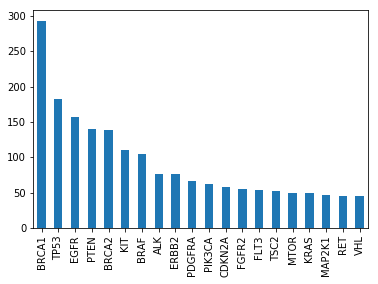

In [36]:
print(pd.value_counts(train['Gene']).nlargest(20))
pd.value_counts(train['Gene']).nlargest(20).plot(kind='bar')

TP53        40
EGFR        29
BRCA1       29
SCN4A       26
TSHR        21
ERBB2       18
BRAF        17
TP63        16
PTEN        15
BRCA2       14
SMAD4       14
PIK3CA      13
LRP5        13
GNE         13
SCN9A       13
CLDN16      12
SPAST       12
ADAMTS13    12
ASS1        12
KRAS        12
Name: Gene, dtype: int64


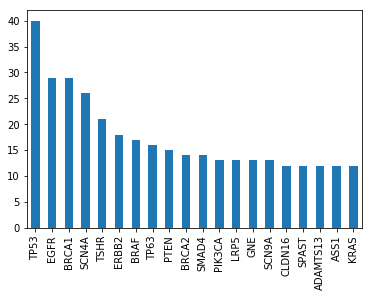

In [37]:
print(pd.value_counts(test['Gene']).nlargest(20))
pd.value_counts(test['Gene']).nlargest(20).plot(kind='bar')

Truncating Mutations    111
Deletion                 88
Amplification            79
Fusions                  37
Overexpression            6
G12V                      4
Q61R                      4
T58I                      3
G12D                      3
E17K                      3
Q61L                      3
G12C                      3
Q61H                      3
G13D                      3
K117N                     2
S308A                     2
TMPRSS2-ERG Fusion        2
S222D                     2
G44D                      2
G35R                      2
Name: Variation, dtype: int64


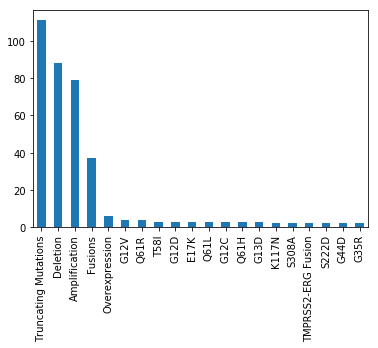

In [38]:
print(pd.value_counts(train['Variation']).nlargest(20))
pd.value_counts(train['Variation']).nlargest(20).plot(kind='bar')

Truncating Mutations    18
Deletion                14
Amplification            7
Fusions                  3
G13R                     2
G13S                     2
G44D                     2
P1193S                   1
T32R                     1
T1151R                   1
E746K                    1
F136L                    1
V617M                    1
R342S                    1
S251N                    1
L858H                    1
R273S                    1
A347S                    1
Y537N                    1
I254T                    1
Name: Variation, dtype: int64


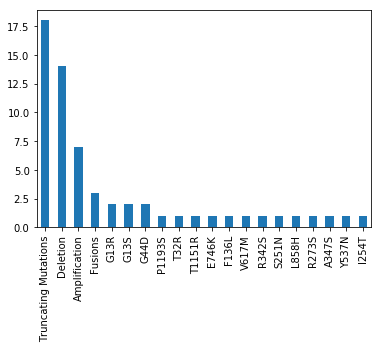

In [39]:
print(pd.value_counts(test['Variation']).nlargest(20))
pd.value_counts(test['Variation']).nlargest(20).plot(kind='bar')

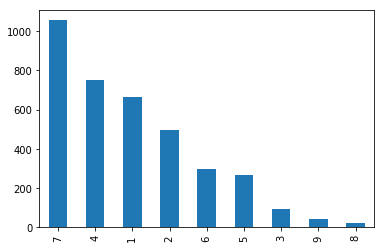

In [40]:
pd.value_counts(train['Class']).plot(kind='bar')

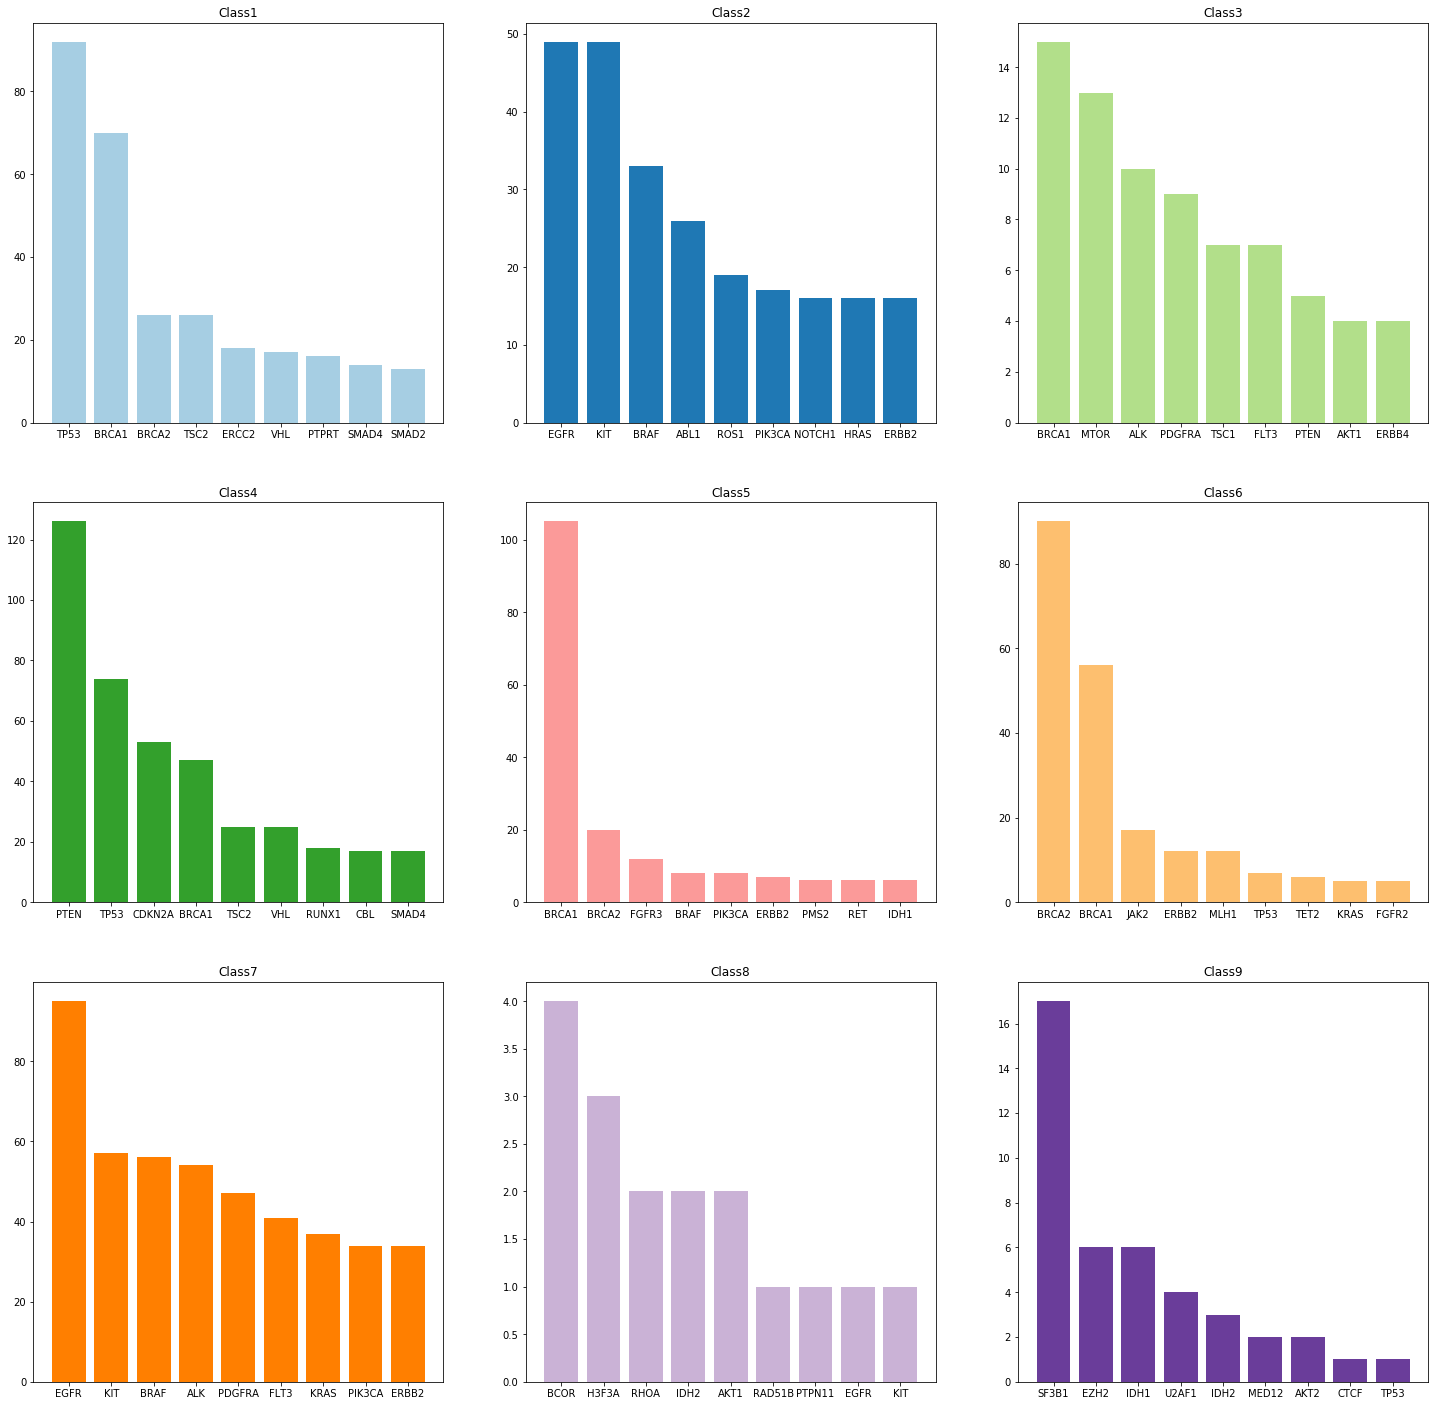

In [41]:
n_class = 9
max_displayed = 9

fig, axes = plt.subplots(3,3,figsize=(25,25))
labels = {}

for i, ax in enumerate(axes.flatten()):
    df = pd.DataFrame(pd.value_counts(train['Gene'][train['Class'] == (i+1)]).nlargest(max_displayed))
    df.columns = ['Freq']
    df['Gene'] = df.index
    df = df.reset_index()
    labels[i] = df['Gene'].values
    x = [i+1 for i in range(max_displayed)]
    y = df['Freq'].values
    title = 'Class' + str(i+1)
    ax.set_title(title)
    ax.bar(x, y, color=plt.cm.Paired(i/10.))
    ax.set_xticks(x)
    ax.set_xticklabels(labels[i])

    del df
plt.show()


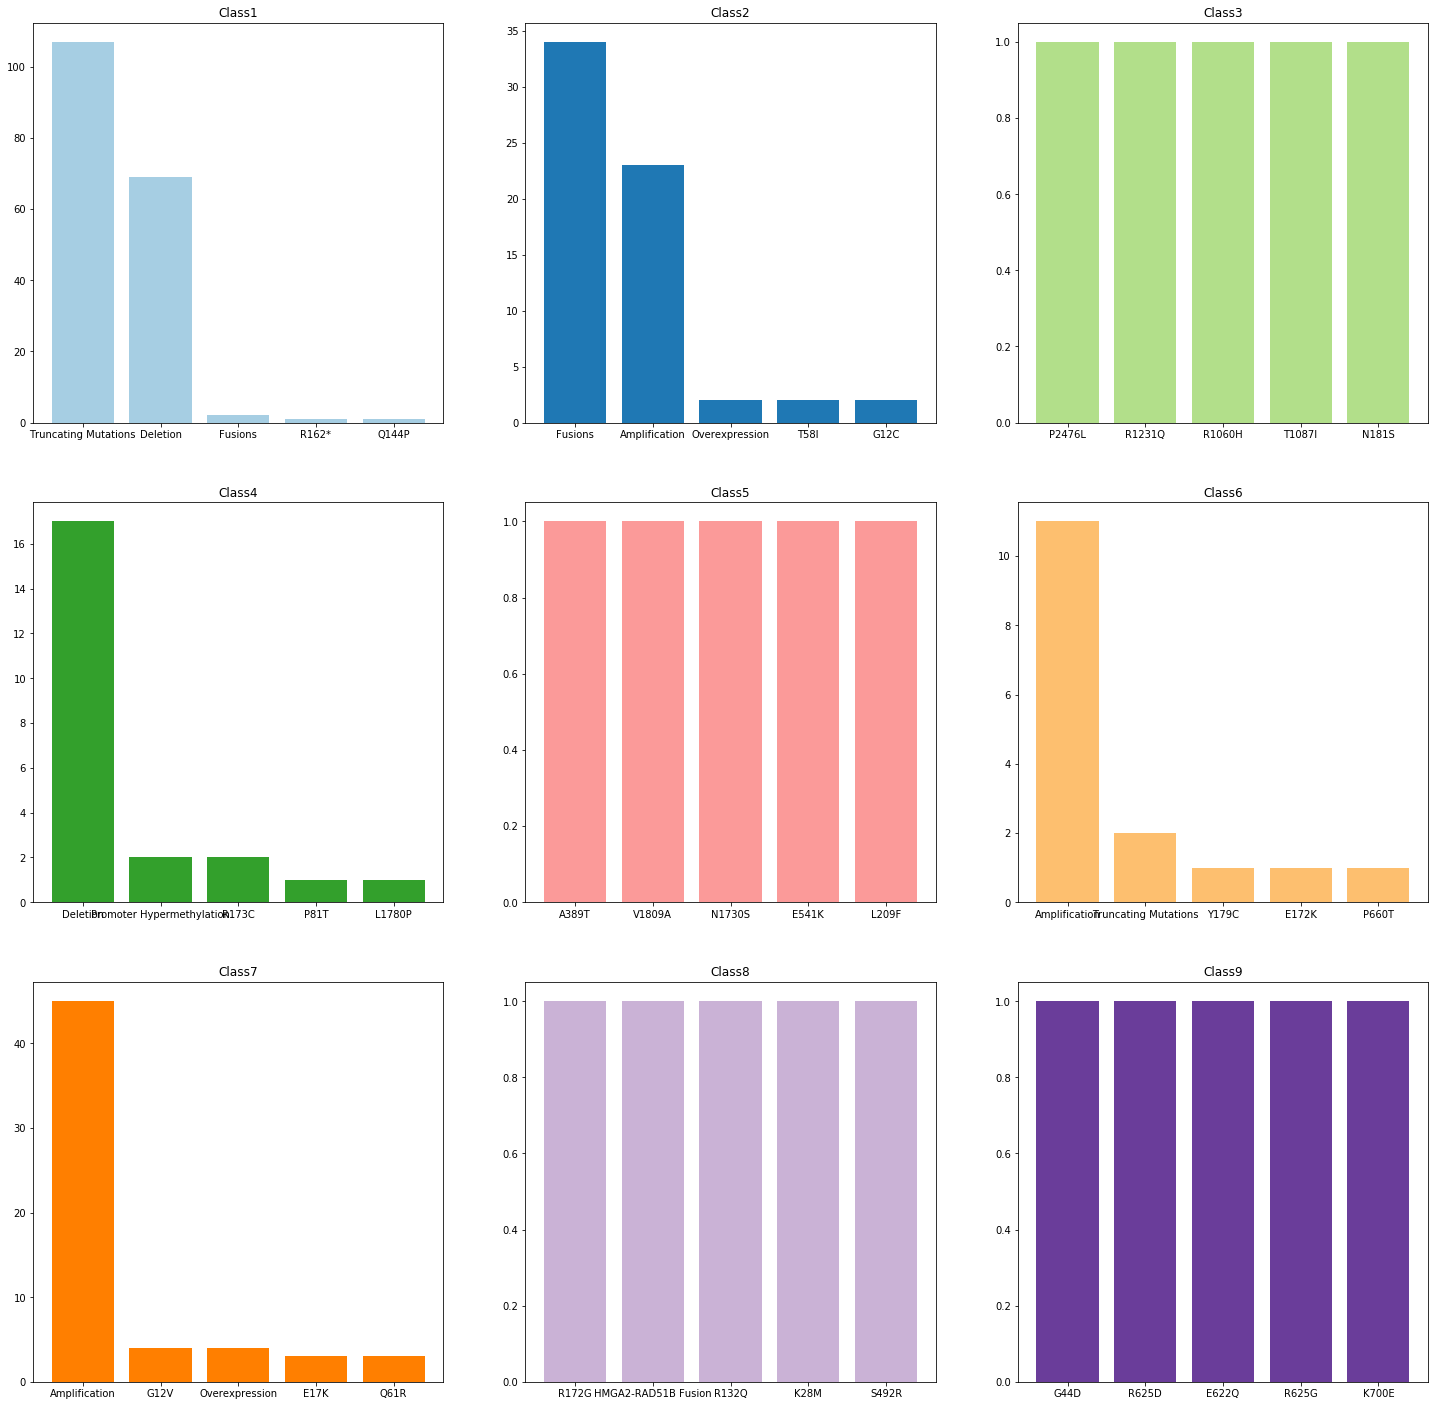

In [42]:
n_class = 9
max_displayed = 5

fig, axes = plt.subplots(3,3,figsize=(25,25))
labels = {}

for i, ax in enumerate(axes.flatten()):
    df = pd.DataFrame(pd.value_counts(train['Variation'][train['Class'] == (i+1)]).nlargest(max_displayed))
    df.columns = ['Freq']
    df['Variation'] = df.index
    df = df.reset_index()
    labels[i] = df['Variation'].values
    x = [i+1 for i in range(max_displayed)]
    y = df['Freq'].values
    title = 'Class' + str(i+1)
    ax.set_title(title)
    ax.bar(x, y, color=plt.cm.Paired(i/10.))
    ax.set_xticks(x)
    ax.set_xticklabels(labels[i])

    del df
plt.show()